In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import ignis
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from qiskit.aqua.components.optimizers import AQGD

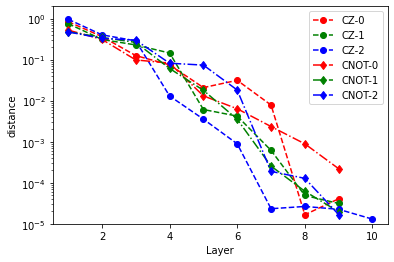

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[8.59279008e-01 3.61255815e-01 2.14673200e-01 7.79650242e-02
 1.01990300e-02 1.21995726e-02 2.83485924e-03 3.07025337e-05
 3.15553291e-05]
[8.67179954e-02 3.76416174e-02 6.71235749e-02 5.42733337e-02
 7.65609527e-03 1.37056271e-02 3.56469101e-03 1.35582590e-05
 7.46184951e-06]


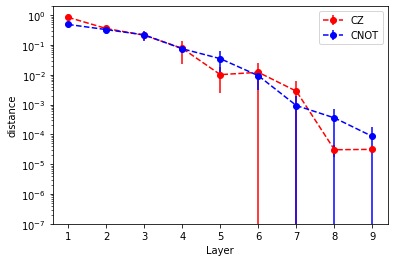

In [109]:
## load txt
data = []
data .append(np.loadtxt('result0.txt', delimiter=',') )
data .append(np.loadtxt('result1.txt', delimiter=',') )
data .append(np.loadtxt('result2.txt', delimiter=',') )

data_CNOT = []
data_CNOT .append(np.loadtxt('result_CNOT_0.txt', delimiter=',') )
data_CNOT .append(np.loadtxt('result_CNOT_1.txt', delimiter=',') )
data_CNOT .append(np.loadtxt('result_CNOT_2.txt', delimiter=',') )

## save graph file
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[0][0], data[0][1], 'ro--', label='CZ-0')
ax.plot(data[1][0], data[1][1], 'go--', label='CZ-1')
ax.plot(data[2][0], data[2][1], 'bo--', label='CZ-2')

ax.plot(data_CNOT[0][0], data_CNOT[0][1], 'rd-.', label='CNOT-0')
ax.plot(data_CNOT[1][0], data_CNOT[1][1], 'gd-.', label='CNOT-1')
ax.plot(data_CNOT[2][0], data_CNOT[2][1], 'bd-.', label='CNOT-2')

ax.set_ylim([1E-5, 2]) 
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Layer')
ax.set_ylabel('distance')
plt.savefig('result_all.pdf')
plt.show()



## average

y = np.zeros([len(data), len(data[0][1])])
for i in range(len(y)):
    y[i][:] = np.array(data[i][1][0:len(y[i])]).copy()
    
x =  np.array(data[1][0]).copy()
y_mean = np.mean(y, axis = 0)
y_std = np.std(y, axis = 0)


y_cnot = np.zeros([len(data_CNOT), len(data_CNOT[0][1])])
for i in range(len(y)):
    y_cnot[i][:] = np.array(data_CNOT[i][1][0:len(y[i])]).copy()
    
x =  np.array(data_CNOT[1][0]).copy()
y_CNOT_mean = np.mean(y_cnot, axis = 0)
y_CNOT_std = np.std(y_cnot, axis = 0)

print(x)
print(y_mean)
print(y_std)

## save graph file
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(x, y_mean,yerr=y_std, ecolor='r', ls = '--', marker = 'o', mec = 'r', mfc = 'r', color = 'r', label='CZ')
ax.errorbar(x, y_CNOT_mean,yerr=y_CNOT_std, ecolor='b', ls = '--', marker = 'o', mec = 'b', mfc = 'b', color = 'b', label='CNOT')
# ax.errorbar(x_CNOT, y_CNOT_mean, y_CNOT_std, 'ro--')
ax.legend()
ax.set_ylim([1E-7, 2]) 
ax.set_yscale('log')
ax.set_xlabel('Layer')
ax.set_ylabel('distance')
plt.savefig('result_avg_std.pdf')
plt.show()

